# **Machine Learning**: <br>
   Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it learn for themselves.
 <br> <br>

Three Types of Learning: <br>
    1 Supervised Learning <br>
    2 Unsupervised Learning <br>
    3 Reinforcement Learning
  <br> <br>
 Supervised Learning: <br>
     Supervised learning as the name indicates the presence of a supervisor as a teacher. Basically supervised learning is a learning in which we teach or train the machine using data which is well labeled that means some data is already tagged with the correct answer. After that, the machine is provided with a new set of examples(data) so that supervised learning algorithm analyses the training data(set of training examples) and produces a correct outcome from labeled data. <br>
     
 For instance:  <br>  suppose you are given an basket filled with different kinds of fruits. Now the first step is to train the machine with all different fruits one by one like this:<br>
 .![alt text](https://media.geeksforgeeks.org/wp-content/uploads/fruits-basket.jpg)
 
 
 If shape of object is rounded and depression at top having color Red then it will be labelled as –Apple.<br>
If shape of object is long curving cylinder having color Green-Yellow then it will be labelled as –Banana<br>


Classification: <br>A classification problem is when the output variable is a category, such as “Red” or “blue” or “disease” and “no disease”.<br>

Regression: <br>A regression problem is when the output variable is a real value, such as “dollars” or “weight”.<br>

Unsupervised learning:<br>
     Unsupervised learning is the training of machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance. Here the task of machine is to group unsorted information according to similarities, patterns and differences without any prior training of data.<br>

Unlike supervised learning, no teacher is provided that means no training will be given to the machine. Therefore machine is restricted to find the hidden structure in unlabeled data by our-self.
<br>
For instance:<br>
 suppose it is given an image having both dogs and cats which have not seen ever.![alt text](https://media.geeksforgeeks.org/wp-content/uploads/cat-and-dogs.jpg)
 
 Clustering: <br>A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.<br>
 
Association: <br>An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.<br>

Reinforcement learning: <br>Reinforcement. It is about taking suitable action to maximize reward in a particular situation. It is employed by various software and machines to find the best possible behavior or path it should take in a specific situation. Reinforcement learning differs from the supervised learning in a way that in supervised learning the training data has the answer key with it so the model is trained with the correct answer itself whereas in reinforcement learning, there is no answer but the reinforcement agent decides what to do to perform the given task. In the absence of training dataset, it is bound to learn from its experience.<br>

Example : <br>The problem is as follows: We have an agent and a reward, with many hurdles in between. The agent is supposed to find the best possible path to reach the reward. The following problem explains the problem more easily.
![alt text](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/Untitled-95.png)

The above image shows robot, diamond and fire. The goal of the robot is to get the reward that is the diamond and avoid the hurdles that is fire. The robot learns by trying all the possible paths and then choosing the path which gives him the reward with the least hurdles. Each right step will give the robot a reward and each wrong step will subtract the reward of the robot. The total reward will be calculated when it reaches the final reward that is the diamond.<br>

Main points in Reinforcement learning –<br>

<br>Input: The input should be an initial state from which the model will start<br>
Output: There are many possible output as there are variety of solution to a particular problem<br>
Training: The training is based upon the input, The model will return a state and the user will decide to reward or punish the model based on its output.<br>
The model keeps continues to learn.<br>
The best solution is decided based on the maximum reward.<br>


# **Context**<br>
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.<br>

**Content**<br>
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:<br>

<br><br>
Age (numeric)<br>
Sex (text: male, female)<br>
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and <br>resident, 2 - skilled, 3 - highly skilled)<br>
Housing (text: own, rent, or free)<br>
Saving accounts (text - little, moderate, quite rich, rich)<br>
Checking account (numeric, in DM - Deutsch Mark)<br>
Credit amount (numeric, in DM)<br>
Duration (numeric, in month)<br>
Purpose (text: car, furniture/equipment, radio/TV, domestic <br>appliances, repairs, education, business, vacation/others)<br>
<br>
https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

# **Bank Customer Segmentation**
In this kernel I will perform segmentation of German bank customers. The first step is to read necessary libraries. We will use:

pandas - to manipulate data frames<br>
numpy - providing linear algebra<br>
seaborm - to create nice visualizations<br>
matplotlib - basic tools for visualizations<br>
scikit-learn - machine learning library<br>
mpl_toolkits - tool for 3d visualization<br>
info_gain - tool for important feature finding<br>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn
from info_gain import info_gain
from sklearn.linear_model import LogisticRegression


**Reading data:**
data in format of csv file comma seperated value

In [0]:
train=pd.read_csv("/content/german_credit_train.csv")

**Top 5 Rows**<br>
using head function can view top 5 rows

In [0]:
train.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


**Data information**<br>
using info command can View data informations 

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


**Unique Values Count by Each Column**<br>
using unique command can see the count of unique values in each column

In [0]:
train.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

# **Visualization**

**Visualizing Target Column**<br>
Target column is having two types of output's good and bad. visualizing data using frequency

Text(0, 0.5, 'Frequency')

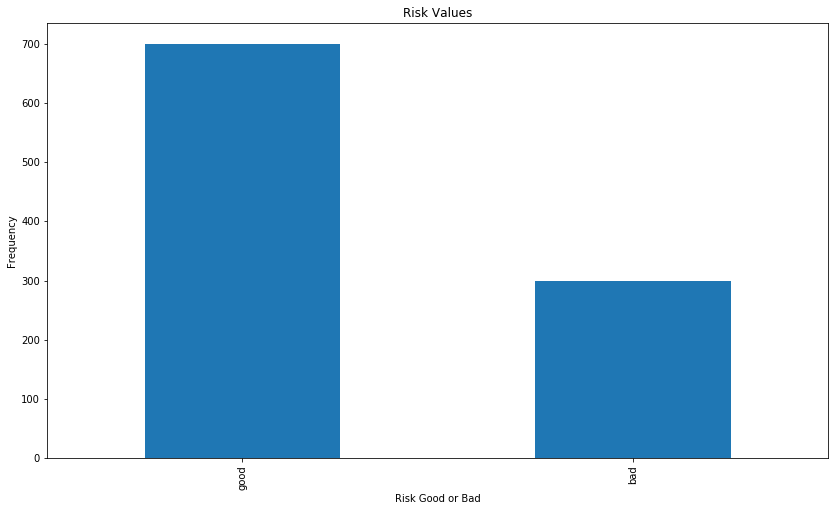

In [0]:
ax = train['Risk'].value_counts())
ax.set_xlabel("Risk Good or Bad")
ax.set_ylabel("Frequency")

**Target Percentages:**
calculating good and bad percentage value


In [0]:
count_no_sub = len(train[train['Risk']=='good'])
count_sub = len(train[train[])
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of bad", pct_of_sub*100)

percentage of good is 70.0
percentage of bad 30.0


**Gender based credit amount and duration Scatterplot**

In [0]:
def scatters(data, h="n", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

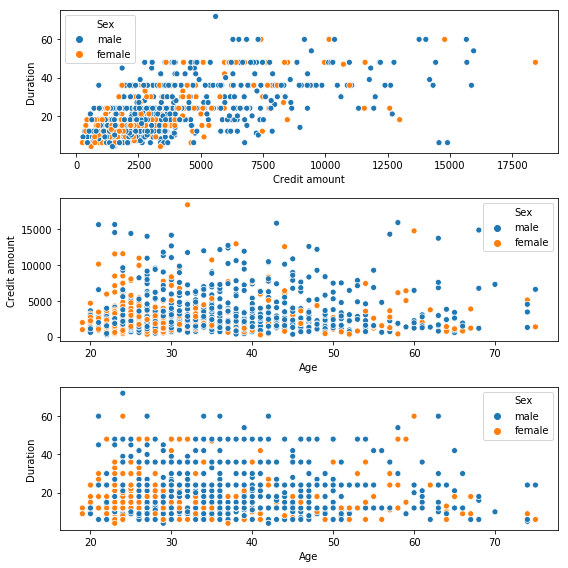

In [0]:
scatters(train, h="Sex")

**Housing frequency Based Bar Plot**

Text(0, 0.5, 'Frequency')

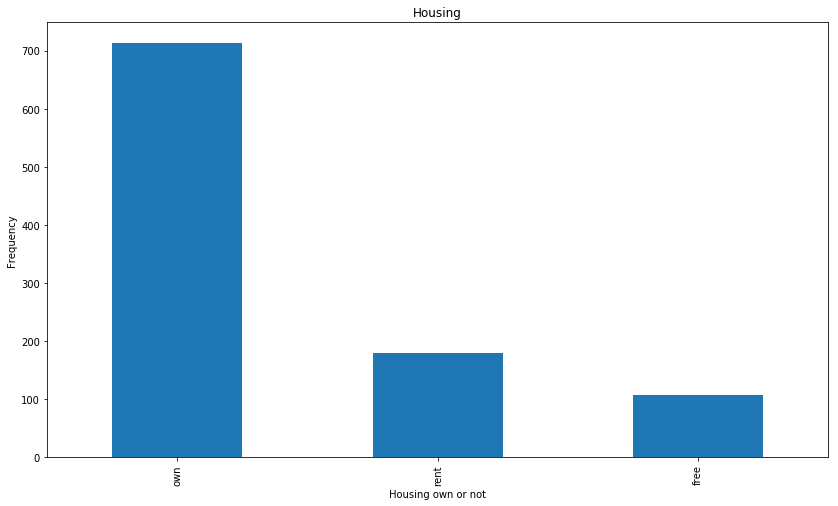

In [0]:
ax = train['Housing'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Housing")
ax.set_xlabel("Housing own or not")
ax.set_ylabel("Frequency")

**Function for boxplot**

In [0]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=train)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()
    

**Gender based Purpose and Credit amount boxplot**

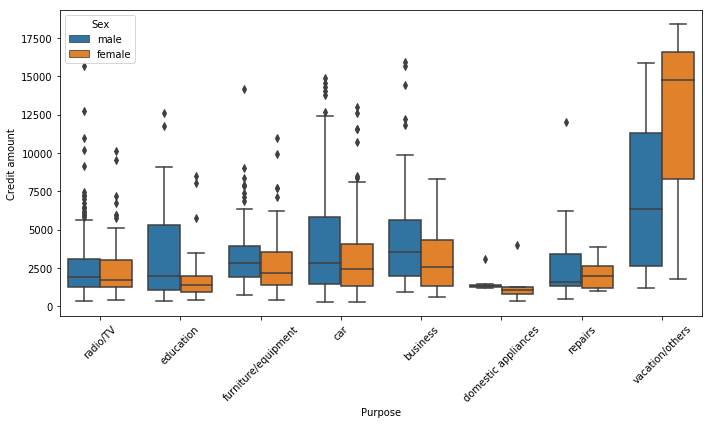

In [0]:
boxes("Purpose","Credit amount","Sex")

**Job based Purpose and Credit amount boxplot**

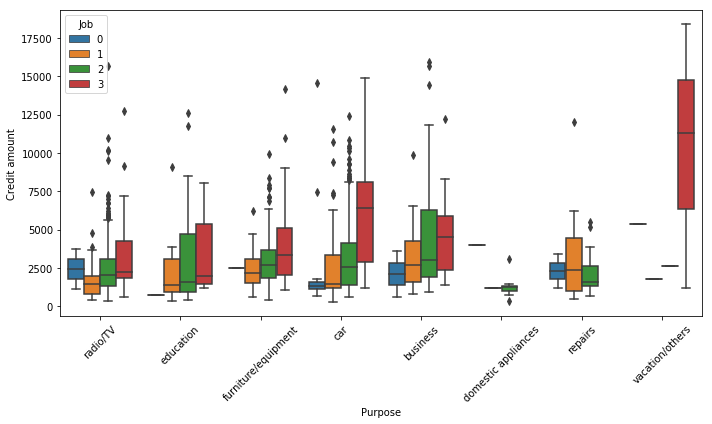

In [0]:
boxes("Purpose","Credit amount","Job")

**Job based Purpose and Duration boxplot**

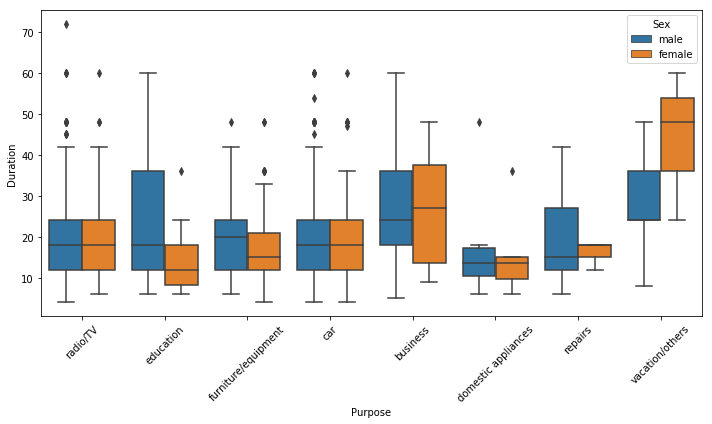

In [0]:
boxes("Purpose","Duration","Sex")

**Gender based Job and Duration boxplot** 

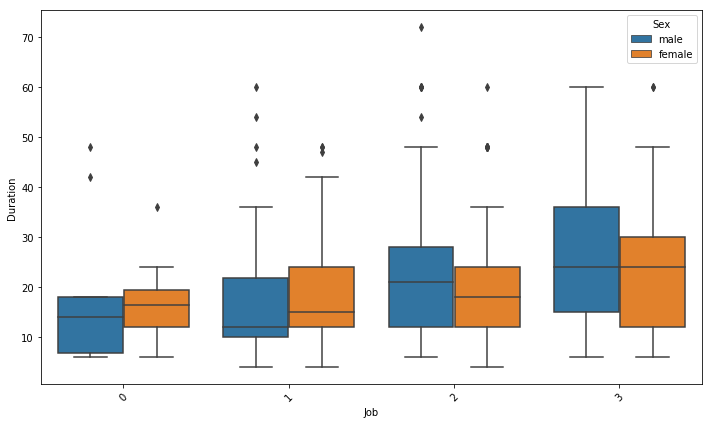

In [0]:
boxes("Job","Duration","Sex")

**3D plot for Credit amount,Duration and Job**

Text(0.5, 0, 'Job')

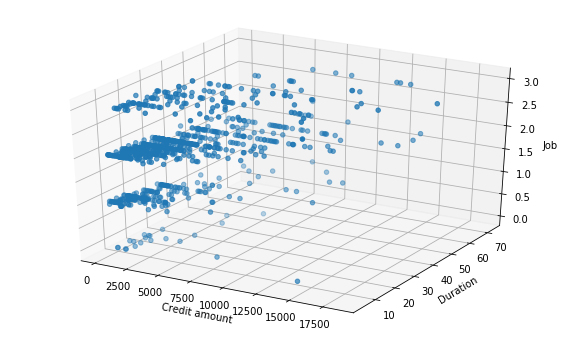

In [0]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train["Credit amount"], train["Duration"], train["Job"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Job")

**3D plot for Credit amount,Duration and Age**

Text(0.5, 0, 'Age')

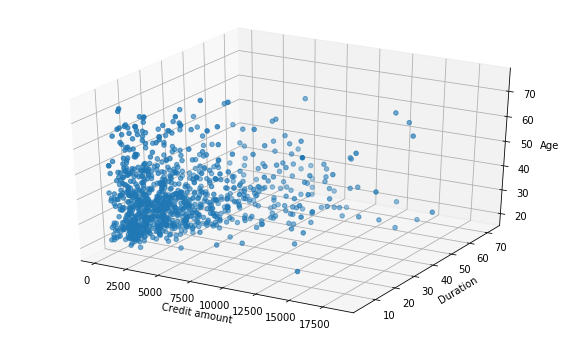

In [0]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train["Credit amount"], train["Duration"], train["Age"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

In [0]:
columns = ["Age","Credit amount", "Duration"]
clust_train = train.loc[:,columns]

In [0]:
def distributions(data):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,12))
    sns.distplot(data["Age"], ax=ax1)
    sns.distplot(data["Credit amount"], ax=ax2)
    sns.distplot(data["Duration"], ax=ax3)
    plt.tight_layout()

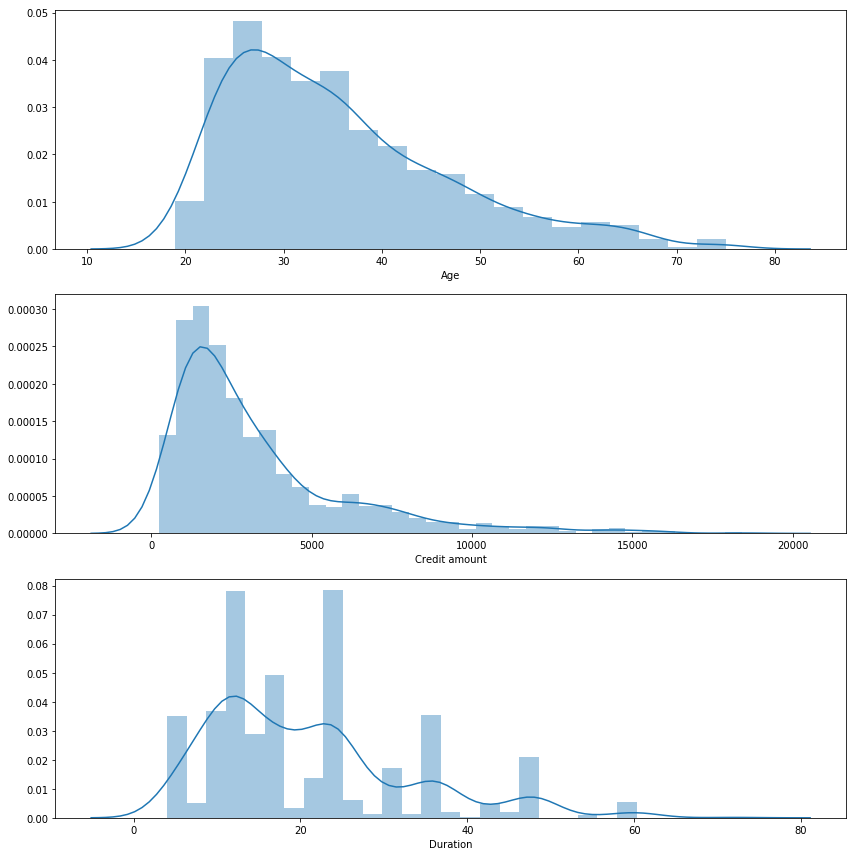

In [0]:
distributions(clust_train)

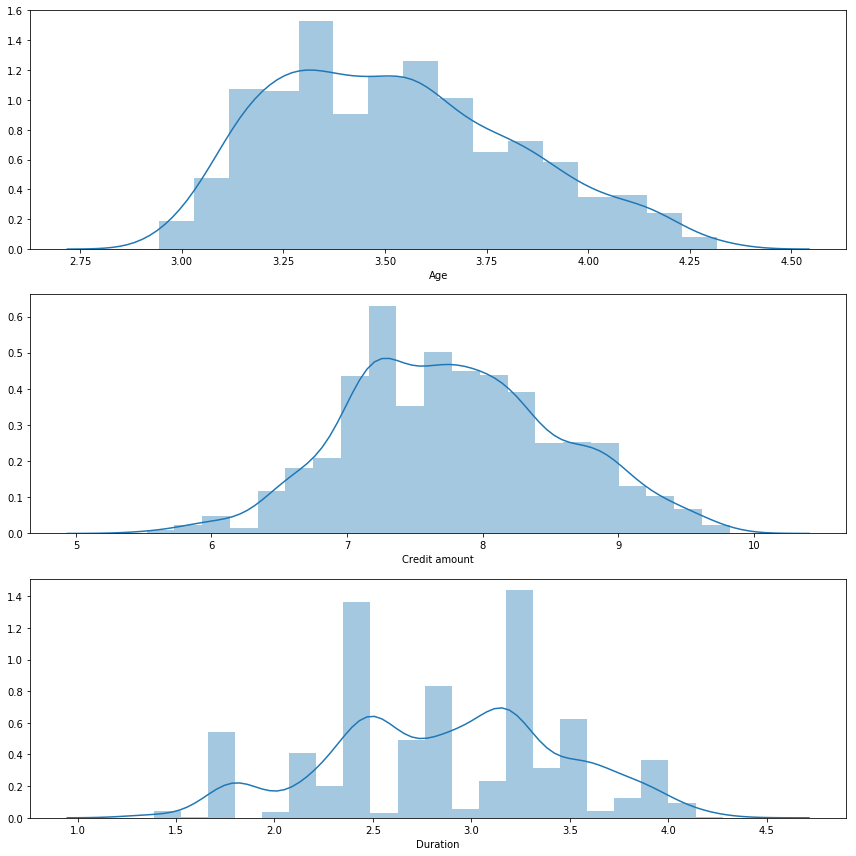

In [0]:
cluster_log = np.log(clust_train)
distributions(cluster_log)

In [0]:
cluster_log.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


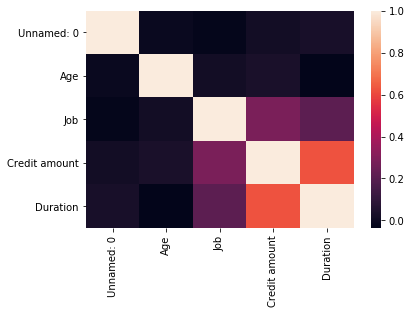

In [0]:
sns.heatmap(train.corr())
plt.show()

In [0]:
train.drop(["Unnamed: 0"], axis = 1, inplace = True) 
  

In [0]:
train = train.fillna(0)

In [0]:
train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,0,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,0,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [0]:

categories = ['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose',]


X, Y = train[categories], train.Risk
#from info_gain import info_gain

In [0]:
#ig  = info_gain.info_gain(X, Y)
#iv  = info_gain.intrinsic_value(fruit, colour)
#igr = info_gain.info_gain_ratio(fruit, colour)


In [0]:
ig  = info_gain.info_gain(X['Age'], Y)
ig

0.03159751025893032

In [0]:
ig  = info_gain.info_gain(X['Sex'], Y)
ig

0.0028055597181085856

In [0]:
ig  = info_gain.info_gain(X['Job'], Y)
ig

0.0009269851357646131

In [0]:
ig  = info_gain.info_gain(X['Housing'], Y)
ig

0.008839835250397332

In [0]:
ig  = info_gain.info_gain(X['Saving accounts'], Y)
ig

0.01948760776931846

In [0]:
ig  = info_gain.info_gain(X['Checking account'], Y)
ig

0.06566796091172744

In [0]:
ig  = info_gain.info_gain(X['Credit amount'], Y)
ig

0.5710015636560071

In [0]:
ig  = info_gain.info_gain(X['Duration'], Y)
ig

0.04391405779718083

In [0]:
ig  = info_gain.info_gain(X['Purpose'], Y)
ig

0.006962995977247477

In [0]:
train['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

In [0]:
train['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [0]:
train['Saving accounts'].value_counts()

little        603
0             183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [0]:
train['Checking account'].value_counts()

0           394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [0]:
train['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

In [0]:
tmp=train

{'boxes': [<matplotlib.lines.Line2D at 0x7f8da6e54b38>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8da6e60358>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8da6e60d30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8da6e609e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8da6e54c88>,
  <matplotlib.lines.Line2D at 0x7f8da6e54fd0>]}

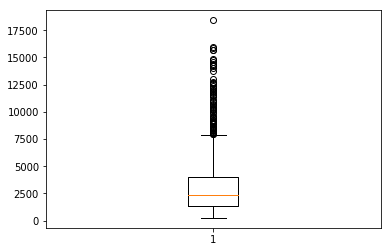

In [0]:
matplotlib.pyplot.boxplot(tmp['Credit amount'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f8da6db0940>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8da6dbb198>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8da6dbbb70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8da6dbb828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8da6db0a90>,
  <matplotlib.lines.Line2D at 0x7f8da6db0e10>]}

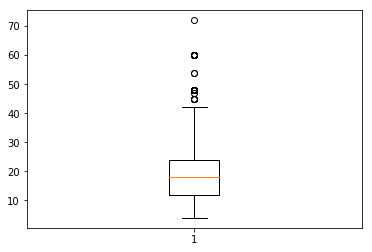

In [0]:
matplotlib.pyplot.boxplot(tmp['Duration'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f8da6d8c6a0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8da6d8ceb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8da6d958d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8da6d95588>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8da6d8c7f0>,
  <matplotlib.lines.Line2D at 0x7f8da6d8cb70>]}

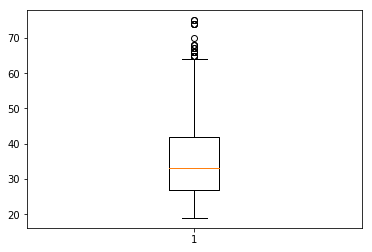

In [0]:
matplotlib.pyplot.boxplot(tmp['Age'])

In [0]:
train['Credit amount']=cluster_log['Credit amount']

In [0]:
train['Duration']=cluster_log['Duration']

In [0]:
train['Age']=cluster_log['Age']

In [0]:
train1=train

{'boxes': [<matplotlib.lines.Line2D at 0x7f8da6d60e10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8da6ce9668>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8da6cf3080>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8da6ce9cf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8da6d60f60>,
  <matplotlib.lines.Line2D at 0x7f8da6ce9320>]}

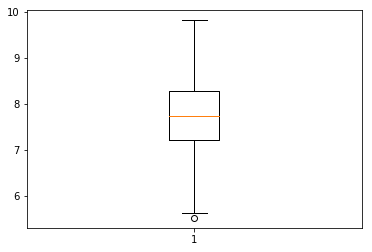

In [0]:
matplotlib.pyplot.boxplot(train['Credit amount'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f8da6cbc080>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8da6cbc898>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8da6cc62b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8da6cbcf28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8da6cbc1d0>,
  <matplotlib.lines.Line2D at 0x7f8da6cbc550>]}

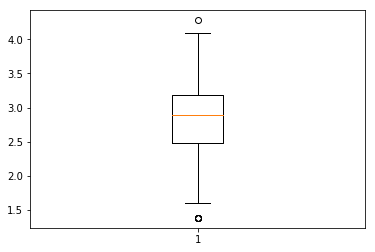

In [0]:
matplotlib.pyplot.boxplot(cluster_log['Duration'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f8da6c8b8d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8da6c97128>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8da6c97b00>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8da6c977b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8da6c8ba20>,
  <matplotlib.lines.Line2D at 0x7f8da6c8bda0>]}

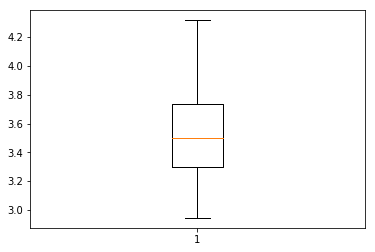

In [0]:
matplotlib.pyplot.boxplot(cluster_log['Age'])

In [0]:
#import numpy as np
#import pandas as pd
"""outliers=[]
def detect_outlier(data_1):
    
    threshold=1.1
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outliers=detect_outlier(train1['Credit amount'])
outliers
minval=min(outliers)
median = train1['Credit amount'].median()
median
train1.loc[train1['Credit amount'] >=minval, 'Credit amount'] = median

"""

"outliers=[]\ndef detect_outlier(data_1):\n    \n    threshold=1.1\n    mean_1 = np.mean(data_1)\n    std_1 =np.std(data_1)\n    for y in data_1:\n        z_score= (y - mean_1)/std_1 \n        if np.abs(z_score) > threshold:\n            outliers.append(y)\n    return outliers\noutliers=detect_outlier(train1['Credit amount'])\noutliers\nminval=min(outliers)\nmedian = train1['Credit amount'].median()\nmedian\ntrain1.loc[train1['Credit amount'] >=minval, 'Credit amount'] = median\n\n"

In [0]:
train['Saving accounts'] = le.fit_transform(train['Saving accounts'].astype(str))
train['Checking account'] = le.fit_transform(train['Checking account'].astype(str))
train['Sex'] = le.fit_transform(train['Sex'].astype(str))
train['Housing'] = le.fit_transform(train['Housing'].astype(str))
train['Purpose'] = le.fit_transform(train['Purpose'].astype(str))

In [0]:
train['Risk'] = le.fit_transform(train['Risk'].astype(str))

In [0]:
train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,4.204693,1,2,1,0,1,7.063904,1.791759,5,1
1,3.091042,0,2,1,1,2,8.691315,3.871201,5,0
2,3.891820,1,1,1,1,0,7.647786,2.484907,3,1
3,3.806662,1,2,0,1,1,8.972337,3.737670,4,1
4,3.970292,1,2,0,1,1,8.490849,3.178054,1,0


In [0]:
clms = ['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose',]


In [0]:

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(train[clms], train['Risk'], test_size=0.3, random_state=0)


In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 18  68]
 [ 20 194]]


In [0]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [0]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=2)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)  

In [0]:
y_pred = classifier.predict(X_test)
print('Accuracy of Knn classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of Knn classifier on test set: 0.60


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=200)



In [0]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [0]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7733333333333333


**IMPORTANT FEATURE BASED MODELING**

In [0]:
#importance based selection
clms = ['Age','Saving accounts','Checking account','Credit amount','Duration']

In [0]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(train[clms], train['Risk'], test_size=0.3, random_state=0)


In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 16  70]
 [ 20 194]]


In [0]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [0]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=2)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)
print('Accuracy of Knn classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of Knn classifier on test set: 0.64


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)



In [0]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [0]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [0]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.76
